In [10]:
%matplotlib inline
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
torch.set_printoptions(edgeitems=2, linewidth=75)

In [59]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] # values in unknown units
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

/home/luba/.local/share/virtualenvs/dl-deep-dive-_doing_-JjS9YL3a/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


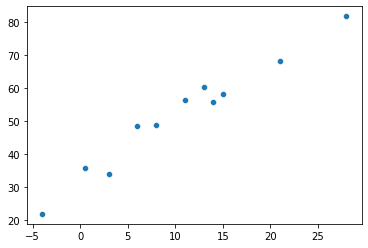

In [12]:
# quick view of the data
_ = sns.scatterplot(t_c, t_u)
plt.show()

In [13]:
# our first model
def model(t_u, w, b):
    return w * t_u + b

In [14]:
# our loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [15]:
# initialize our values
w = torch.ones(())
b = torch.zeros(())

# pred tensor
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000])

In [16]:
# check the loss
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [17]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c)) - loss_fn(model(t_u, w - delta, b), t_c) / (2.0 * delta)

loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c)) - loss_fn(model(t_u, w, b - delta), t_c) / (2.0 * delta)


In [18]:
# we should scale the rate of change by a small factor: learning rate
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

w

tensor(45.6279)

In [19]:
# doing the same with bias instead of the weights
b = b - learning_rate * loss_rate_of_change_b
b

tensor(70.0602)

In [20]:
# derivative of the loss
def dloss_fn(t_p, t_c):
    dsq_diffs = 2*(t_p - t_c) / t_p.size(0)  # the division is from the derivative of mean
    return dsq_diffs


In [21]:
def dmodel_dw(t_u, w, b):
    return t_u

In [22]:
def dmodel_db(t_u, w, b):
    return 1.0

In [23]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

The summation is the reverse of the broadcasting we implicitly do when applying the parameters to an entire vector of inputs in the model

## Using `torch.stack`

In [49]:
vec1 = torch.tensor([1, 2, 3])
vec2 = torch.tensor([3, 4, 5])

wo_stack = [vec1.sum(), vec2.sum()]
wi_stack = torch.stack([vec1.sum(), vec2.sum()])
print(wo_stack)
print(wi_stack.shape)

[tensor(6), tensor(12)]
torch.Size([2])


In [50]:
wi_stack

tensor([ 6, 12])

In [51]:
wi_stack = torch.stack([vec1, vec2], dim=0)

In [52]:
wi_stack.size()

torch.Size([2, 3])

In [53]:
vec1.size()

torch.Size([3])

In [54]:
vec2.size()

torch.Size([3])

In [55]:
wi_stack

tensor([[1, 2, 3],
        [3, 4, 5]])

In [56]:
torch.cat([vec1, vec2], dim=0)

tensor([1, 2, 3, 3, 4, 5])

## Iterating to fit the model

In [57]:
# training iteration = epoch
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad

        print('Epoch {}, Loss {}'.format(epoch, float(loss)))
    return params

In [66]:
params = training_loop(
    n_epochs=100,
    learning_rate=1e-4,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_u,
    t_c=t_c
)

Epoch 1, Loss 1763.884765625
Epoch 2, Loss 323.09051513671875
Epoch 3, Loss 78.92963409423828
Epoch 4, Loss 37.5528450012207
Epoch 5, Loss 30.540283203125
Epoch 6, Loss 29.351154327392578
Epoch 7, Loss 29.148883819580078
Epoch 8, Loss 29.113847732543945
Epoch 9, Loss 29.107145309448242
Epoch 10, Loss 29.105247497558594
Epoch 11, Loss 29.104167938232422
Epoch 12, Loss 29.103221893310547
Epoch 13, Loss 29.102294921875
Epoch 14, Loss 29.10137939453125
Epoch 15, Loss 29.100465774536133
Epoch 16, Loss 29.09954833984375
Epoch 17, Loss 29.098630905151367
Epoch 18, Loss 29.09771728515625
Epoch 19, Loss 29.0967960357666
Epoch 20, Loss 29.09588050842285
Epoch 21, Loss 29.094959259033203
Epoch 22, Loss 29.09404945373535
Epoch 23, Loss 29.0931339263916
Epoch 24, Loss 29.09221649169922
Epoch 25, Loss 29.09130096435547
Epoch 26, Loss 29.09038543701172
Epoch 27, Loss 29.08946418762207
Epoch 28, Loss 29.088550567626953
Epoch 29, Loss 29.087635040283203
Epoch 30, Loss 29.086713790893555
Epoch 31, Loss 

In [67]:
t_un = 0.1 * t_u

params = training_loop(
    n_epochs=5000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_un,
    t_c=t_c
)

Epoch 1, Loss 80.36434173583984
Epoch 2, Loss 37.574913024902344
Epoch 3, Loss 30.871076583862305
Epoch 4, Loss 29.756193161010742
Epoch 5, Loss 29.507152557373047
Epoch 6, Loss 29.3924560546875
Epoch 7, Loss 29.298828125
Epoch 8, Loss 29.208717346191406
Epoch 9, Loss 29.119415283203125
Epoch 10, Loss 29.030488967895508
Epoch 11, Loss 28.941877365112305
Epoch 12, Loss 28.853565216064453
Epoch 13, Loss 28.765552520751953
Epoch 14, Loss 28.6778507232666
Epoch 15, Loss 28.590431213378906
Epoch 16, Loss 28.503318786621094
Epoch 17, Loss 28.4164981842041
Epoch 18, Loss 28.329973220825195
Epoch 19, Loss 28.243741989135742
Epoch 20, Loss 28.157804489135742
Epoch 21, Loss 28.07215118408203
Epoch 22, Loss 27.986797332763672
Epoch 23, Loss 27.9017276763916
Epoch 24, Loss 27.81694984436035
Epoch 25, Loss 27.732463836669922
Epoch 26, Loss 27.648256301879883
Epoch 27, Loss 27.56434440612793
Epoch 28, Loss 27.4807071685791
Epoch 29, Loss 27.397361755371094
Epoch 30, Loss 27.314294815063477
Epoch 31,

In [70]:
params

tensor([  5.3671, -17.3012])

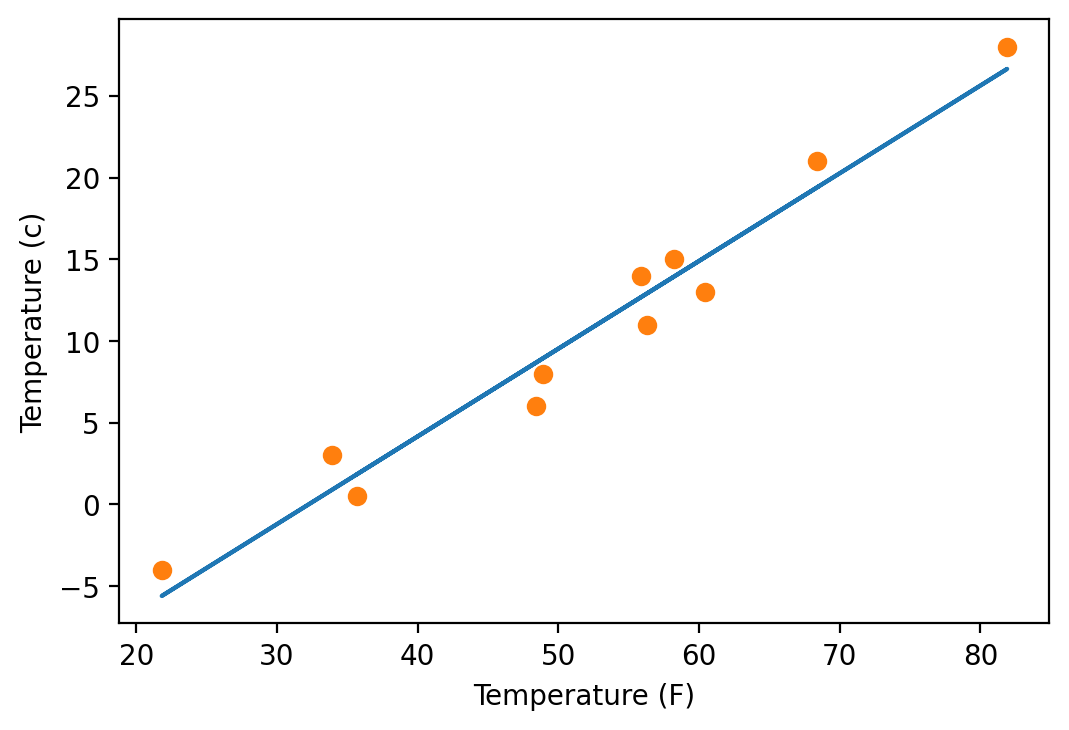

In [72]:
# lets visualize
t_p = model(t_un, *params)

fig = plt.figure(dpi=200)

plt.xlabel("Temperature (F)")
plt.ylabel("Temperature (c)")
plt.plot(t_u.numpy(), t_p.detach().numpy())  # line plot for the prediction
plt.plot(t_u.numpy(), t_c.numpy(), 'o')  # scatter plot for the points on Celsius
